In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read file as weekly cases
cases = pd.read_csv('../assets/datagov/dengue-cases-count-weekly/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv')
#Read file as mss
meteo = pd.read_csv('../assets/mss/mss_data.csv')

### Look at meterological trends

In [3]:
#drop column 1
meteo=meteo.iloc[:,1:]

In [4]:
# Convert all columns to lowercase and replace spaces in column names.
meteo.columns = meteo.columns.str.lower().str.replace(' ', '_')

In [5]:
#drop all rows with missing year
meteo.drop(meteo[meteo['year'].isnull()].index, inplace = True)

In [6]:
#get week number
meteo['date']=pd.to_datetime(meteo[['year', 'month', 'day']])
meteo['eweek']=meteo['date'].dt.isocalendar().week

<AxesSubplot:title={'center':'Average weekly rainfall over the 52 weeks'}, xlabel='eweek'>

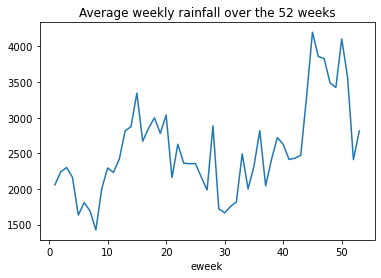

In [7]:
rainfall=meteo.groupby(by=["year","eweek"]).sum()
rainfall=rainfall.reset_index()
rainfall=rainfall[["year","eweek","daily_rainfall_total"]]
rainfall.rename(columns={"daily_rainfall_total":"rainfall_weekly_cum"},inplace=True)

rainfall_grp=rainfall.groupby(by="eweek").mean()['rainfall_weekly_cum']
rainfall_grp.plot(title="Average weekly rainfall over the 52 weeks")

<AxesSubplot:title={'center':'Average weekly temperature over the 52 weeks'}, xlabel='eweek'>

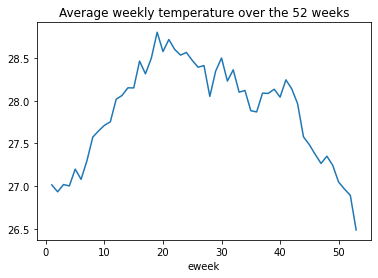

In [8]:
temp=meteo.groupby(by=["year","eweek"]).mean()
temp=temp.reset_index()
temp=temp[["year","eweek","mean_temperature"]]
temp.rename(columns={"mean_temperature":"temperature_weekly_avg"},inplace=True)

temp_grp=temp.groupby(by="eweek").mean()['temperature_weekly_avg']
temp_grp.plot(title="Average weekly temperature over the 52 weeks")

### Look at dengue case trends

In [9]:
cases = cases.loc[cases['type_dengue'] == "Dengue"]
cases.drop(columns={"type_dengue"},inplace=True,errors="ignore")
cases.rename(columns={'number':'dengue_case_count'},inplace=True)

<AxesSubplot:title={'center':'Average weekly dengue case count over the 52 weeks'}, xlabel='eweek'>

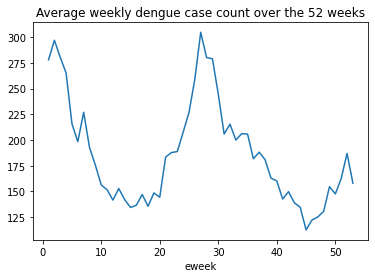

In [10]:
cases_grp=cases.groupby(by="eweek").mean()['dengue_case_count']
cases_grp.plot(title="Average weekly dengue case count over the 52 weeks")

In [11]:
df_comb=pd.DataFrame([cases_grp,temp_grp,rainfall_grp]).T

,dengue_case_count,temperature_weekly_avg,rainfall_weekly_cum
eweek,,,
1,278.0,27.014732,2057.550000
2,297.0,26.933742,2239.557143
3,280.4,27.018524,2300.435714
4,265.2,27.002947,2161.607143
5,215.8,27.199551,1632.414286
6,198.4,27.079928,1808.021429
7,227.0,27.296523,1690.285714
8,192.8,27.574369,1424.035714
9,175.6,27.648578,2002.171429


In [12]:
normalizer = MinMaxScaler()

In [19]:
names=['dengue_case_count','temperature_weekly_avg','rainfall_weekly_cum']

for name in names:
    df_comb[name]=normalizer.fit_transform(df_comb[[name]])

<AxesSubplot:xlabel='eweek'>

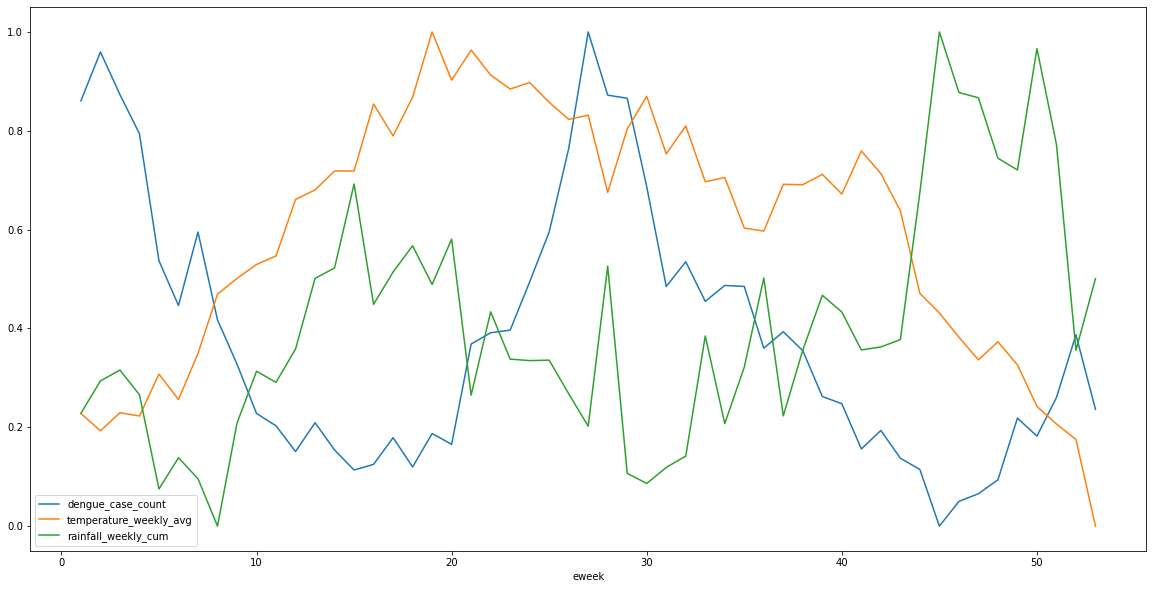

In [22]:
df_comb.plot(figsize=(20,10))